# Image Recognition with Inception-V3 Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook

In [2]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image

model = InceptionV3(weights='imagenet')

Using TensorFlow backend.


In [3]:
entry = []
IMAGES_DIR = 'images'
for image_name in  tqdm_notebook(os.listdir(IMAGES_DIR), desc='classifying..'):
    file_path = os.path.join(IMAGES_DIR, image_name)
    img = image.load_img(file_path)
    X = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

    preds = model.predict(X)
    print('Predicted:', decode_predictions(preds, top=1)[0], '\n')
    
    # Store recognition results
    results = ''
    for res in decode_predictions(preds, top=5)[0]:
        results += str(round(res[2],4))+': '+str(res[1])+'\n'
    entry.append([image_name, results])

Predicted: [('n01614925', 'bald_eagle', 0.0046625733)] 

Predicted: [('n09428293', 'seashore', 0.01581755)] 

Predicted: [('n02412080', 'ram', 0.010031239)] 

Predicted: [('n04592741', 'wing', 0.005946916)] 

Predicted: [('n02930766', 'cab', 0.00625199)] 

Predicted: [('n02480495', 'orangutan', 0.0057022218)] 

Predicted: [('n11879895', 'rapeseed', 0.013674645)] 

Predicted: [('n07579787', 'plate', 0.008274115)] 

Predicted: [('n01592084', 'chickadee', 0.0046112337)] 




Sample output
```python
Predicted: [('n02412080', 'ram', 0.75557435), ('n02415577', 'bighorn', 0.21466102), ('n02417914', 'ibex', 0.002030042), ('n02408429', 'water_buffalo', 0.00030687757), ('n02403003', 'ox', 0.00027784813)]
```

#### Stored results

In [4]:
ind = 0
print(entry[ind][0] + '\n\n' +entry[ind][1])

giant-eagle.jpg

0.0047: bald_eagle
0.004: kite
0.0038: vulture
0.0033: hen
0.0029: coil



## Visualize Recognition Results
image source: https://pixabay.com

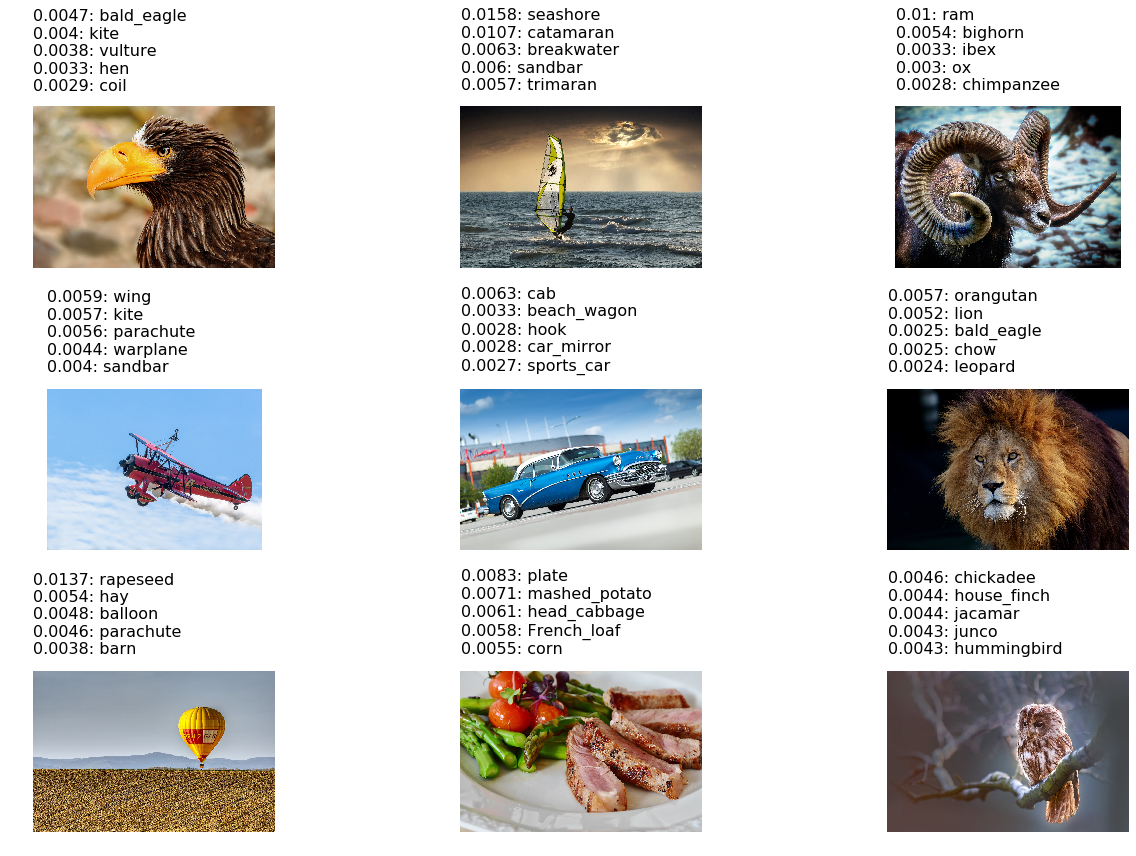

In [5]:
fig = plt.figure(figsize=(18, 12))
for i, obj in enumerate(entry):
    image_name, results = obj[0], obj[1]
    ax = plt.subplot(3, 3, 1+i)
    _ = ax.imshow(plt.imread(os.path.join(IMAGES_DIR, image_name)))
    _ = ax.text(1, 0, results, size=16)
    _ = ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.75)
plt.show()